<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_7_Classification2_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 7: Classification2
# MSSV - Họ tên


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Import libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

In [3]:
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#**Task 1.** The dataset1 includes 2 columns: data and labels (5 labels: business, entertainment, politics, sport, tech).

#Task 1.1. Load and remove duplicates in the dataset1.

In [4]:
#code
dataset1 = pd.read_csv("dataset1.csv")

In [5]:
dataset1.duplicated().sum()

99

In [6]:
dataset1.drop_duplicates(keep="first", inplace=True)

#Task 1.2. Apply preprocessing techniques to the dataset1. ***Done by Black Nguyen***

In [7]:
#code
stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [8]:
def preprocessing(txt):
    tokens = word_tokenize(txt)
    words = [lemma.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(words)

In [9]:
txt = dataset1["data"][0]
txt

'Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.  "The US is the worlds biggest music market, which means something has to be done about the creaky 

In [10]:
txt2 = preprocessing(txt)
txt2

'Musicians tackle US red tape Musicians group tackle US visa regulation blamed hindering British act chance succeeding across Atlantic A singer hoping perform US expect pay simply obtaining visa Groups including Musicians Union calling end raw deal faced British performer US act faced comparable expense bureaucracy visiting UK promotional purpose Nigel McCune Musicians Union said British musician disadvantaged compared US counterpart A sponsor make petition behalf form amounting nearly page musician face tougher regulation athlete journalist If make mistake form risk ban thus ability career say Mr McCune The US world biggest music market mean something done creaky bureaucracy say Mr McCune The current situation preventing British act maintaining momentum developing US added The Musicians Union stance endorsed Music Managers Forum MMF say British artist face uphill struggle succeed US thanks tough visa requirement also seen impractical The MMFs general secretary James Seller said Imagin

In [11]:
dataset1["data"] = dataset1["data"].apply(preprocessing)

In [12]:
encoder=LabelEncoder()
dataset1['labels']=encoder.fit_transform(dataset1['labels'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset1["data"], dataset1["labels"], test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer()

X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

#Task 1.3. Apply decision tree classifier to the preprocessed dataset

In [17]:
#code
dt_clf = tree.DecisionTreeClassifier(max_depth=2)
dt_clf = dt_clf.fit(X_train_cv, y_train)
dt_y_pred = dt_clf.predict(X_test_cv)

#Task 1.4. Plot decision tree using tree.plot_tree(clf)

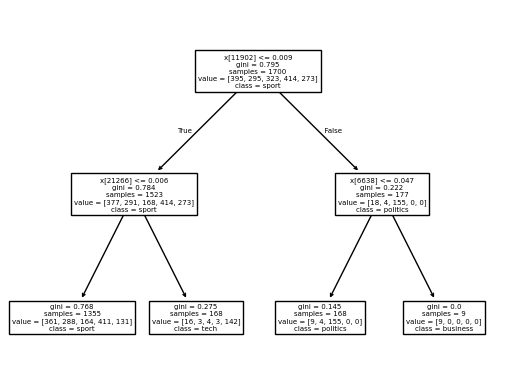

In [18]:
#code
tree.plot_tree(dt_clf, class_names=["business", "entertainment", "politics", "sport", "tech"])
plt.show()

#Task 1.5. Report confusion matrix and the values of metrics (i.e., accuracy, precision, recall, f1, ...)

In [19]:
#code
# Confusion Matrix
cm = confusion_matrix(y_test, dt_y_pred)
# Accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
# Precision
dt_precision = precision_score(y_test, dt_y_pred, average='macro')
# Recall
dt_recall = recall_score(y_test, dt_y_pred, average='macro')
# F1-Score
dt_f1 = f1_score(y_test, dt_y_pred, average='macro')

print('Confusion Matrix:')
print(cm)
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)
print('F1-Score:', dt_f1)

Confusion Matrix:
[[  1   0   1 102   4]
 [  0   0   0  73   1]
 [  0   0  36  43   1]
 [  0   0   0  91   0]
 [  0   0   1  38  34]]
Accuracy: 0.38028169014084506
Precision: 0.6119232519338692
Recall: 0.3850025367833587
F1-Score: 0.3291626282076622


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Task 1.6. Apply KNN to the preprocessed dataset and evaluate the performance of the model using metrics as in Task 1.3

In [20]:
#code
kNN_clf = KNeighborsClassifier(n_neighbors=5)
kNN_clf.fit(X_train_cv, y_train)
kNN_y_pred = kNN_clf.predict(X_test_cv)

# Confusion Matrix
cm = confusion_matrix(y_test, kNN_y_pred)
# Accuracy
kNN_accuracy = accuracy_score(y_test, kNN_y_pred)
# Precision
kNN_precision = precision_score(y_test, kNN_y_pred, average='macro')
# Recall
kNN_recall = recall_score(y_test, kNN_y_pred, average='macro')
# F1-Score
kNN_f1 = f1_score(y_test, kNN_y_pred, average='macro')

print('Confusion Matrix:')
print(cm)
print('Accuracy:', kNN_accuracy)
print('Precision:', kNN_precision)
print('Recall:', kNN_recall)
print('F1-Score:', kNN_f1)

Confusion Matrix:
[[94  1  7  0  6]
 [ 1 69  3  1  0]
 [ 0  0 79  1  0]
 [ 0  0  0 91  0]
 [ 2  1  1  0 69]]
Accuracy: 0.9436619718309859
Precision: 0.9434351104595278
Recall: 0.9471016564509714
F1-Score: 0.9439543881167329


#Task 1.7. Apply Naive Bayes classifier to the preprocessed dataset
Gaussian Naïve Bayes algorithm works with continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution.

In [21]:
#code
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_cv.toarray(), y_train)
gnb_y_pred = gnb_clf.predict(X_test_cv.toarray())

# Confusion Matrix
cm = confusion_matrix(y_test, gnb_y_pred)
# Accuracy
nb_accuracy = accuracy_score(y_test, gnb_y_pred)
# Precision
nb_precision = precision_score(y_test, gnb_y_pred, average='macro')
# Recall
nb_recall = recall_score(y_test, gnb_y_pred, average='macro')
# F1-Score
nb_f1 = f1_score(y_test, gnb_y_pred, average='macro')

print('Confusion Matrix:')
print(cm)
print('Accuracy:', nb_accuracy)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1-Score:', nb_f1)

Confusion Matrix:
[[96  1  4  0  7]
 [ 3 67  0  0  4]
 [ 2  2 74  1  1]
 [ 0  0  0 91  0]
 [ 2  4  0  0 67]]
Accuracy: 0.9272300469483568
Precision: 0.9246787779360407
Recall: 0.9274205026944753
F1-Score: 0.9256362678588148


#Task 1.8. Summary the performance (accuracy, precision, recall, f1) of 3 models (Decision Tree, kNN, Naive Bayes) using PrettyTable


```
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
```



In [22]:
#code
from prettytable import PrettyTable

myTable = PrettyTable(["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

myTable.add_row(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1])
myTable.add_row(["KNN", kNN_accuracy, kNN_precision, kNN_recall, kNN_f1])
myTable.add_row(["Naive Bayes", nb_accuracy, nb_precision, nb_recall, nb_f1])

print(myTable)

+---------------+---------------------+--------------------+--------------------+--------------------+
|     Model     |       Accuracy      |     Precision      |       Recall       |      F1-Score      |
+---------------+---------------------+--------------------+--------------------+--------------------+
| Decision Tree | 0.38028169014084506 | 0.6119232519338692 | 0.3850025367833587 | 0.3291626282076622 |
|      KNN      |  0.9436619718309859 | 0.9434351104595278 | 0.9471016564509714 | 0.9439543881167329 |
|  Naive Bayes  |  0.9272300469483568 | 0.9246787779360407 | 0.9274205026944753 | 0.9256362678588148 |
+---------------+---------------------+--------------------+--------------------+--------------------+


#Task 1.9. Plot ROC curve and report the AUC values for classification results on test set in Task 1.3, Task 1.6 and Task 1.7.

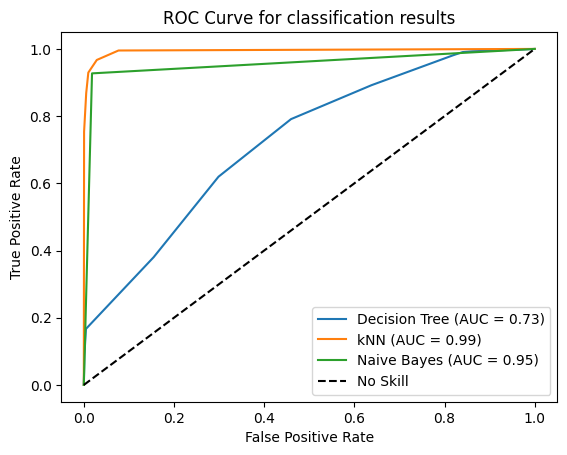

In [37]:
#code
class_feature_values = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=class_feature_values)

# Decision Tree
dt_y_proba = dt_clf.predict_proba(X_test_cv)

dt_fpr = {}
dt_tpr = {}
dt_roc_auc = {}
for i in range(len(class_feature_values)):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_y_proba[:, i])
    dt_roc_auc[i] = auc(dt_fpr[i], dt_tpr[i])

dt_fpr_micro, dt_tpr_micro, _ = roc_curve(y_test_bin.ravel(), dt_y_proba.ravel())
dt_roc_auc_micro = auc(dt_fpr_micro, dt_tpr_micro)

# kNN
kNN_y_proba = kNN_clf.predict_proba(X_test_cv)

kNN_fpr = {}
kNN_tpr = {}
kNN_roc_auc = {}
for i in range(len(class_feature_values)):
    kNN_fpr[i], kNN_tpr[i], _ = roc_curve(y_test_bin[:, i], kNN_y_proba[:, i])
    kNN_roc_auc[i] = auc(kNN_fpr[i], kNN_tpr[i])

kNN_fpr_micro, kNN_tpr_micro, _ = roc_curve(y_test_bin.ravel(), kNN_y_proba.ravel())
kNN_roc_auc_micro = auc(kNN_fpr_micro, kNN_tpr_micro)

# Naive Bayes

gnb_y_proba = gnb_clf.predict_proba(X_test_cv.toarray())

gnb_fpr = {}
gnb_tpr = {}
gnb_roc_auc = {}
for i in range(len(class_feature_values)):
    gnb_fpr[i], gnb_tpr[i], _ = roc_curve(y_test_bin[:, i], gnb_y_proba[:, i])

gnb_fpr_micro, gnb_tpr_micro, _ = roc_curve(y_test_bin.ravel(), gnb_y_proba.ravel())
gnb_roc_auc_micro = auc(gnb_fpr_micro, gnb_tpr_micro)

plt.figure()
plt.plot(dt_fpr_micro, dt_tpr_micro, label=f'Decision Tree (AUC = {dt_roc_auc_micro:.2f})')
plt.plot(kNN_fpr_micro, kNN_tpr_micro, label=f'kNN (AUC = {kNN_roc_auc_micro:.2f})')
plt.plot(gnb_fpr_micro, gnb_tpr_micro, label=f'Naive Bayes (AUC = {gnb_roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for classification results")
plt.legend(loc="lower right")
plt.show()



---



#Task 2.
For the dataset2 concerning whether transactions of credit cards are fraudulent or not.

#Task 2.1. Load dataset2 and apply approriate preprocessing techniques to the dataset2

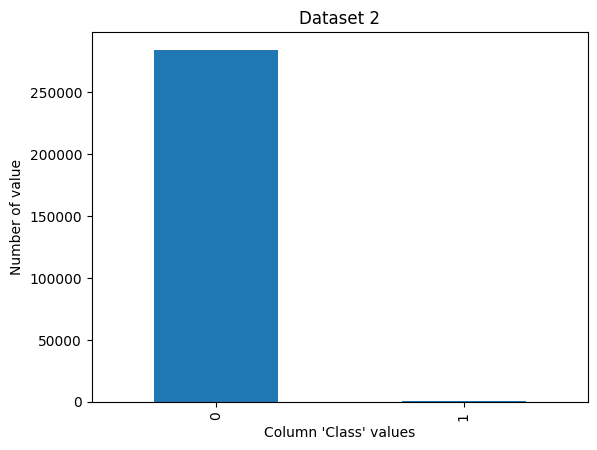

In [30]:
#code
dataset2 = pd.read_csv("dataset2.csv")
dataset2['Class'].value_counts().plot(kind='bar')
plt.title('Dataset 2')
plt.xlabel("Column 'Class' values")
plt.ylabel("Number of value")
plt.show()

#Task 2.2. Apply decision tree algorithm to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

#Task 2.3. Apply KNN algorithm to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

##Task 2.4. Apply RandomForest to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

#Task 2.5. Plot ROC curve and report the AUC values for classification results on test set in Task2.2, Task 2.3 and Task 2.4.

In [ ]:
#code

#Task 2.6. Apply Oversampling technique to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

#Task 2.7. Apply RandomForest, Decision Tree, kNN to preprocessed dataset in Task 2.6. Then report the performance of models using PrettyTable

In [ ]:
#code

#Task 2.8. Apply Undersampling technique to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

#Task 2.9. Apply RandomForest, Decision Tree, kNN to preprocessed dataset in Task 2.8. Then report the performance of models using PrettyTable

In [ ]:
#code

#Task 2.10. Apply SMOTE technique to the preprocessed dataset in the Task 2.1.

In [ ]:
#code

#Task 2.11. Apply RandomForest, Decision Tree, kNN to preprocessed dataset in Task 2.10. Then report the performance of models using PrettyTable

In [ ]:
#code

#Task 2.12. Plot ROC curve and report the AUC values for the best models found in Task2.7, Task 2.9 and Task 2.11 on test set.

In [ ]:
#code